In [19]:

# webscrape 20 images each of 10 characters
# save images to folder

import os
from bing_image_downloader import downloader
import shutil
import matplotlib.pyplot as plt

# create folder to save images if it doesn't exist
if not os.path.exists('images'):
    os.mkdir('images')
if not os.path.exists('imagestest'):
    os.mkdir('imagestest')

# temp folder incase any image in main folder gets deleted (reducing time taken while running)
if not os.path.exists('imageswork'):
    os.mkdir('imageswork')

# create list of characters
characters = ['Narendra Modi', 'Leonardo DiCaprio', 'Tom Cruise']


In [20]:
# %%script false --no-raise-error
# delete all folders which are not in characters
import cv2
for folder in os.listdir('images'):
    if folder not in characters:
        shutil.rmtree('images/' + folder)
# loop through each character
for character in characters:
    # download 20 images of each character
    downloader.download(character+" face", limit=15, output_dir='images/', adult_filter_off=True, force_replace=False, timeout=60, verbose=False,filter='photo')

for character in characters:
    if not os.path.exists('imageswork/'+ character+" face"):
        os.mkdir('imageswork/'+ character+" face")

for character in characters:
    for image in os.listdir('images/' + character+" face"):
        img = cv2.imread('images/' + character+" face" + '/' +image)
        cv2.imwrite('imageswork/'+ character+" face" + '/' + image, img)

[%] Downloading Images to c:\Users\khite\OneDrive\Documents\Sem 6\Machine Learning\Project\EigenFaces-Crispy-Recursive-download\EigenFaces-Crispy-Recursive-download\images\Narendra Modi face
[!] Issue getting: https://www.celebrity-cutouts.co.uk/wp-content/uploads/2018/03/narendra-modi-celebrity-mask.png
[!] Error:: HTTP Error 404: Not Found
[!] Issue getting: https://i.guim.co.uk/img/media/73c69c9fef6527c98208df69ec8c1096c0f06469/0_116_3820_2292/master/3820.jpg?width=445&amp;quality=45&amp;auto=format&amp;fit=max&amp;dpr=2&amp;s=00ee438409358816771ea50ab9aa6d28
[!] Error:: HTTP Error 401: Unauthorized - missing signature
[!] Issue getting: http://www.suntiros.com/wp-content/uploads/2016/12/Narendra-Modi-1.jpg
[!] Error:: HTTP Error 403: Forbidden
[!] Issue getting: https://www.whoa.in/20140224-Whoa/Narendra-Modi-Smiley-Face-Closeup-with-Dark-Background-Wallpaper.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certif

In [21]:
# create face only images

for character in characters:
    for image in os.listdir('imageswork/' + character+" face"):
        img = cv2.imread('imageswork/' + character+" face" + '/' +image)
        cv2.imwrite('images/'+ character + '/' + image, img)


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

# delete and recreate images_512_face folder
if os.path.exists('images_512_face'):
    shutil.rmtree('images_512_face')
os.mkdir('images_512_face')

for folder in os.listdir('images_512_face'):
    if folder not in characters:
        shutil.rmtree('images_512_face/' + folder)
for character in characters:
    if not os.path.exists('imagestest/'+ character+" face"):
        os.mkdir('imagestest/'+ character+" face")

# loop through each character
for character in characters:
    # create folder to save images if it doesn't exist
    if not os.path.exists('images_512_face/' + character):
        os.mkdir('images_512_face/' + character)
    # loop through each image
    for image in os.listdir('images/' + character+" face"):
        # read image
        imgOG = cv2.imread('images/' + character+" face" + '/' +image)
        #read img but as grayscale
        # cv2.IMREAD_GRAYSCALE
        img = cv2.imread('images/' + character+" face" + '/' +image, 0)
        # # Convert into grayscale
        # img = cv2.cvtColor(imgOG, cv2.COLOR_BGR2GRAY)
        # detect faces
        result = face_cascade.detectMultiScale3(img, 1.1, 4, outputRejectLevels=True)
        face=result[0]
        levelWeight=result[2]
        temp=None
        f=0
        #skip example if confidence not high enough
        while( len(face) == 0 or (levelWeight[0] < 20)):
            f=0
            # raise Exception("No face detected")
            # checking if face can be found, if no we change the image
            os.remove('images/' + character+" face" + '/'+image)
            shutil.rmtree('imagestest/' + character+" face/")
            downloader.download(character+" face", limit=1, output_dir='imagestest/', adult_filter_off=True, force_replace=False, timeout=60, verbose=False,filter='photo')
            for image1 in os.listdir('imagestest/' + character+" face"):
                img=cv2.imread('imagestest/' + character+" face" + '/'+image1)
                temp=img
                result = face_cascade.detectMultiScale3(img, 1.1, 4, outputRejectLevels=True)
                face=result[0]
                levelWeight=result[2]
                f=1
        if f==1:
            cv2.imwrite('images/'+ character+" face" + '/' + image, temp)

#crop face
for character in characters:
    for image in os.listdir('images/' + character+" face"):
        imgOG = cv2.imread('images/' + character+" face" + '/' +image)
        img = cv2.imread('images/' + character+" face" + '/' +image, 0)
        result = face_cascade.detectMultiScale3(img, 1.1, 4, outputRejectLevels=True)
        face=result[0]
        for (x, y, w, h) in face:
            imgOG = imgOG[y:y+h, x:x+w]
        # resize image
        imgOG = cv2.resize(imgOG, (256, 256))
        # save image
        cv2.imwrite('images_512_face/' + character + '/' + image, imgOG)

shutil.rmtree('imagestest/')
shutil.rmtree('imageswork/')


[%] Downloading Images to c:\Users\khite\OneDrive\Documents\Sem 6\Machine Learning\Project\EigenFaces-Crispy-Recursive-download\EigenFaces-Crispy-Recursive-download\imagestest\Narendra Modi face


[%] Done. Downloaded 1 images.
[%] Downloading Images to c:\Users\khite\OneDrive\Documents\Sem 6\Machine Learning\Project\EigenFaces-Crispy-Recursive-download\EigenFaces-Crispy-Recursive-download\imagestest\Narendra Modi face


[%] Done. Downloaded 1 images.
[%] Downloading Images to c:\Users\khite\OneDrive\Documents\Sem 6\Machine Learning\Project\EigenFaces-Crispy-Recursive-download\EigenFaces-Crispy-Recursive-download\imagestest\Narendra Modi face


[%] Done. Downloaded 1 images.
[%] Downloading Images to c:\Users\khite\OneDrive\Documents\Sem 6\Machine Learning\Project\EigenFaces-Crispy-Recursive-download\EigenFaces-Crispy-Recursive-download\imagestest\Leonardo DiCaprio face
[!] Issue getting: https://www.partypeople.company/uploads/1/7/6/2/17627711/s454377924454347902_p98_i66_w826.jpeg
[!]

In [22]:
# create dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.DataFrame()
y=pd.DataFrame(columns=['character'])

def clamp(n, minn, maxn): 
    return max(min(maxn, n), minn)

# loop through every image
for character in characters:
    for image in os.listdir('images_512_face/' + character):
        # read image as grayscale
        img = cv2.imread('images_512_face/' + character + '/' + image, 0)
        #flatten image
        imgFlat = img.flatten()
        # add image to dataset
        df = pd.concat([df, pd.DataFrame(imgFlat).T], ignore_index=True)
        # add label to y
        y = pd.concat([y, pd.DataFrame([character], columns=['character'])], ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,4,23,4,46,20,116,35,100,168,183,...,6,9,10,7,7,5,6,7,5,6
1,0,0,141,253,247,239,235,237,234,233,...,0,0,0,0,0,0,0,0,0,0
2,123,124,126,128,130,131,133,135,139,142,...,67,68,64,68,74,78,80,79,79,78
3,237,237,237,244,254,252,235,198,186,188,...,238,237,237,237,237,237,237,237,237,237
4,255,255,255,255,255,255,255,255,254,254,...,43,48,48,52,55,57,54,56,48,47
5,5,20,6,45,20,117,34,101,165,182,...,7,7,10,7,6,3,8,6,5,6
6,234,234,234,234,234,234,234,234,235,235,...,83,83,83,82,81,79,78,78,78,78
7,5,22,3,46,21,115,34,100,166,184,...,7,8,10,7,6,5,6,7,5,6
8,66,58,54,56,54,54,50,55,54,57,...,199,199,200,200,200,199,199,200,201,201
9,5,22,3,46,21,115,34,100,166,184,...,7,8,10,7,6,5,6,7,5,6


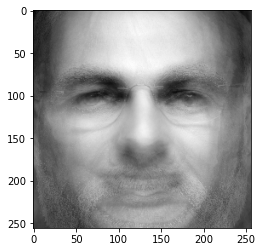

In [23]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
# calculate mean of each column
mean = df.mean(axis=0)
#show mean face by unflattening
plt.imshow(mean.values.reshape(256, 256), cmap='gray')
plt.show()

In [24]:
# standardize data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy Score is : 0.89
                   precision    recall  f1-score   support

Leonardo DiCaprio       1.00      0.50      0.67         2
    Narendra Modi       1.00      1.00      1.00         3
       Tom Cruise       0.80      1.00      0.89         4

         accuracy                           0.89         9
        macro avg       0.93      0.83      0.85         9
     weighted avg       0.91      0.89      0.88         9



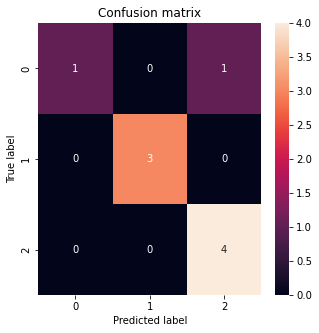

In [33]:
#function to do PCA with given number of components
def doPCA(n):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

# doing pca with 5 components
X_train_pca, X_test_pca = doPCA(5)

# 1-NN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train.values.ravel())
print("Accuracy Score is : {:.2f}".format(knn.score(X_test_pca, y_test)))

# predict on test set
y_pred = knn.predict(X_test_pca)

# print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
